## This notebook extracts information from the output files of anvi-display-contig-stats to calculate average number of ORFs/contig in each assembly.

#### Import all required modules

In [1]:
import pandas as pd
import os as os
import glob as glob
import numpy as np
import re as re
import seaborn as sns
import matplotlib.pyplot as plt

### Function to extract information from contig-stats output files

#### Assuming all output files for each assembly type are in separate directories, and they are the only .txt files in that directory

In [6]:
def calc_average_orf_per_contig(assembler):
    df = pd.DataFrame(columns=['Metagenome','Assembly','Average number of ORFs/contig', 'Average contig length (bp)'])
    for f in glob.glob("*.txt"):
        name, b = f.split('-contig')
        stats = pd.read_csv(f, sep='\t', index_col=0)
        mgn = stats.columns[0]
        contigs = stats.loc['Num Contigs'][0]
        genes = stats.loc['Num Genes (prodigal)'][0]
        length = stats.loc['Total Length'][0]
        avg_orfs = genes/contigs
        avg_len = length/contigs
        row = [name, assembler, avg_orfs, avg_len]
        df.loc[len(df.index)] = row
    return(df)

#### Generate individual data frames for each assembly type

In [11]:
os.chdir("/Users/nastassia.patin/Desktop/Projects/Lasker2019/PacBio/metaFlye/contig-stats")
metaflye = calc_average_orf_per_contig('metaflye')
os.chdir("/Users/nastassia.patin/Desktop/Projects/Lasker2019/PacBio/hybridSPAdes/contig-stats")
hybrid = calc_average_orf_per_contig('hybridSPAdes')
os.chdir("/Users/nastassia.patin/Desktop/Projects/Lasker2019/PacBio/annotations-Illumina-matching/contig-stats")
illumina = calc_average_orf_per_contig('SPAdes')

In [12]:
illumina

,Metagenome,Assembly,Average number of ORFs/contig,Average contig length (bp)
0,1903c122_28m-2_bmtag_SPAdes,SPAdes,0.984408,332.364903
1,Las19c138_27m-1_bmtag_bbnorm_SPAdes,SPAdes,1.458451,1011.659063
2,1903c122_28m-1_NOAA1163b_S143_L003_bmtag_SPAdes,SPAdes,0.899634,317.264838
3,1903c126_45m-1_bmtag_SPAdes,SPAdes,1.535612,1153.538122
4,1903c129_26m-2_bmtag_SPAdes,SPAdes,1.420113,977.973971
5,Las19c135_5m-1_bmtag_SPAdes,SPAdes,0.909116,275.992971
6,1903c124_15m-1_bmtag_SPAdes,SPAdes,0.918486,282.687693
7,1903c144_13m-2_NOAA1163b_S163_L003_bmtag_SPAdes,SPAdes,0.861271,254.718455
8,1903c119_11m-2_bmtag_SPAdes,SPAdes,0.936064,282.327940
9,1903c111_10m-1_bmtag_SPAdes,SPAdes,0.936772,290.236480


In [13]:
df_all = pd.concat([metaflye, hybrid, illumina])

In [14]:
df_all

,Metagenome,Assembly,Average number of ORFs/contig,Average contig length (bp)
0,Las19c107_10m-3metaFlye,metaflye,13.200000,11592.600000
1,1903c126_45m-3metaFlye,metaflye,16.797246,16952.427859
2,Las19c138_27m-3metaFlye,metaflye,12.882415,12613.625937
3,1903c129_26m-3metaFlye,metaflye,5.555527,4412.188338
4,1903c111_10m-3metaFlye,metaflye,13.780936,10535.591973
5,1903c122_28m-3metaFlye,metaflye,13.553030,10421.636364
6,1903c118_23m-3metaFlye,metaflye,20.650000,15946.750000
7,1903c123_10m-3metaFlye,metaflye,11.530405,10310.131757
8,1903c119_11m-3metaFlye,metaflye,4.073039,3574.732750
9,1903c127_7m-3metaFlye,metaflye,11.804196,7666.902098


### Violin plots by metric with average values of each assembler plotted

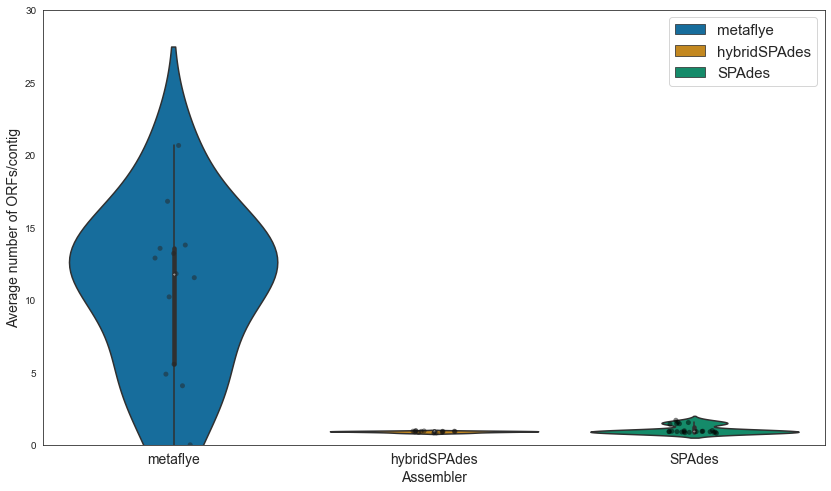

In [15]:
plt.figure(figsize=(14,8))
sns.set_style("white")
grped_vplot = sns.violinplot(data=df_all, x="Assembly", y="Average number of ORFs/contig", hue="Assembly", 
              palette="colorblind", scale='width', dodge=False) # split=True, inner="quart", linewidth=1, 
grped_vplot = sns.stripplot(data=df_all, x="Assembly", y="Average number of ORFs/contig", color="k", alpha=0.5, 
                            hue="Assembly")
#plt.title("Assembly metrics by program")
plt.ylabel("Average number of ORFs/contig", size=14)
plt.xlabel("Assembler", size=14)
plt.xticks(size=14)
plt.ylim(0, 30)
#ax.set_xticks([0,1,3,5])

# Let us first get legend information from the plot object
handles, labels = grped_vplot.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:3], labels[0:3], prop={'size': 15})

#plt.savefig("assemblers_four_metrics_violin.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

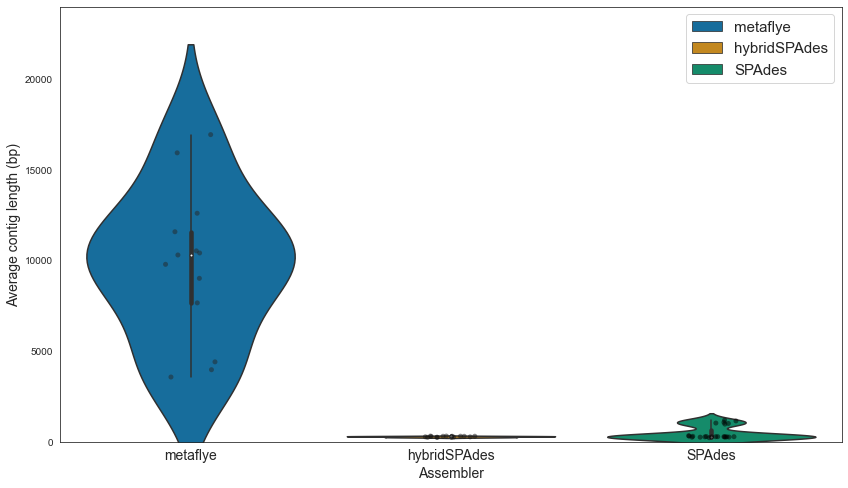

In [19]:
plt.figure(figsize=(14,8))
sns.set_style("white")
grped_vplot = sns.violinplot(data=df_all, x="Assembly", y="Average contig length (bp)", hue="Assembly", 
              palette="colorblind", scale='width', dodge=False) # split=True, inner="quart", linewidth=1, 
grped_vplot = sns.stripplot(data=df_all, x="Assembly", y="Average contig length (bp)", color="k", alpha=0.5, 
                            hue="Assembly")
#plt.title("Assembly metrics by program")
plt.ylabel("Average contig length (bp)", size=14)
plt.xlabel("Assembler", size=14)
plt.xticks(size=14)
plt.ylim(0, 24000)
#ax.set_xticks([0,1,3,5])

# Let us first get legend information from the plot object
handles, labels = grped_vplot.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:3], labels[0:3], prop={'size': 15})

#plt.savefig("assemblers_four_metrics_violin.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

### Scatter plot of a metric by sample sets

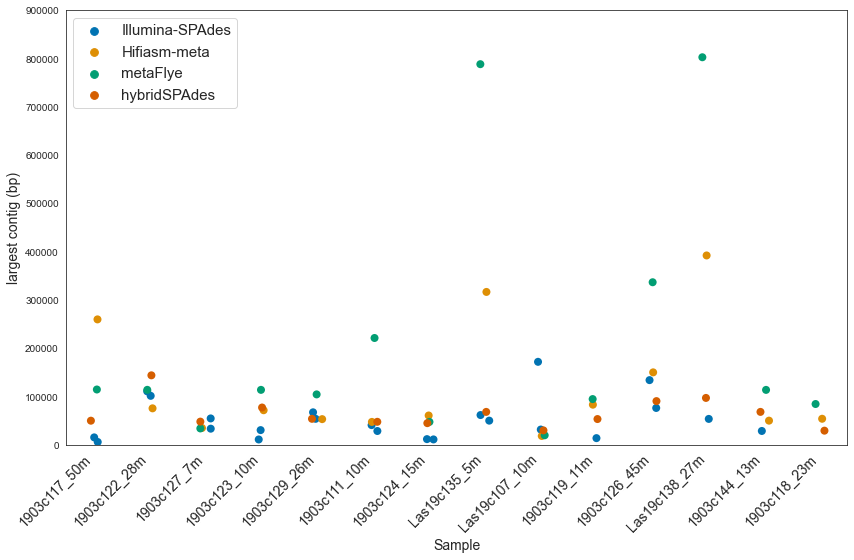

In [42]:
plt.figure(figsize=(14,8))
sns.set_style("white")
grped_vplot = sns.stripplot(data=df_four, x="Assembly", y="value",
                             hue="Assembler", color="k", dodge=False, palette="colorblind", size=8) # [df_four["Metric"] == "# contigs (>= 1000 bp)"]
#plt.title("Assembly metrics by program")
plt.ylabel("largest contig (bp)", size=14)
plt.xlabel("Sample", size=14)
plt.xticks(rotation=45, ha='right', size=14)
plt.ylim(0, 900000)

# Let us first get legend information from the plot object
handles, labels = grped_vplot.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:4], labels[0:4], prop={'size': 15})

plt.savefig("assemblers_four_largetscontigs_scatter.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

## Plot mapped Illumina reads for each set of assemblies

In [4]:
os.chdir("/Users/nastassia.patin/Desktop/Projects/Lasker2019/Long read paper/mSystems/Revisions")
mapping = pd.read_csv("mapped_reads_comparison_v2.csv")
mapping.head()

,Sample,Assembler,Illumin rep,Total reads,# number reads mapped,% reads mapped
0,1903c111_10m-3,Hifiasm-meta,2,26819212,1948.0,0.0
1,1903c111_10m-3,Hifiasm-meta,1,22944790,4013.0,0.0
2,1903c117_50m-3,Hifiasm-meta,1,15783468,1198422.0,7.6
3,1903c117_50m-3,Hifiasm-meta,2,39962582,2604519.0,6.5
4,1903c118_23m-3,Hifiasm-meta,2,18211920,4966.0,0.0


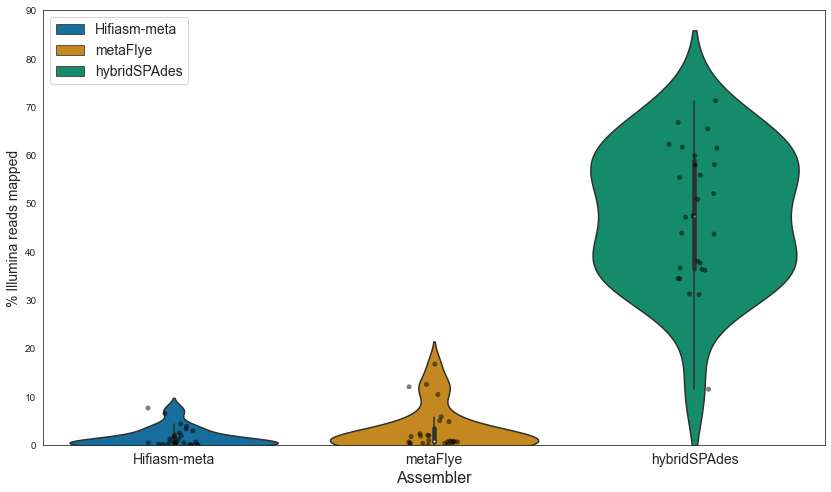

In [6]:
plt.figure(figsize=(14,8))
sns.set_style("white")
vplot = sns.violinplot(data=mapping, x="Assembler", y="% reads mapped", hue="Assembler",
                             palette="colorblind", dodge=False)  
vplot = sns.stripplot(data=mapping, x="Assembler", y="% reads mapped", color="k", alpha=0.5, 
                            dodge=False)
#plt.title("Assembly metrics by program")
plt.ylabel("% Illumina reads mapped", size=14)
plt.xlabel("Assembler", size=16)
plt.xticks(size=14)
plt.ylim(0, 90)

# Let us first get legend information from the plot object
handles, labels = vplot.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:3], labels[0:3], prop={'size': 14}, loc="upper left")

plt.savefig("assemblers_mappedreads_v2.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()